# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)
conn = engine.connect()

## Explore Database

In [5]:
# Use the Inspector to explore the database and print the table names
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['emoji']

In [6]:
# Use Inspector to print the column names and types
inspector = inspect(engine)
columns = inspector.get_columns('emoji')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [7]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
Emoji_Query = engine.execute("Select * from emoji limit 10")
for query in Emoji_Query:
    print(query)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect database and Query

In [8]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [9]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [10]:
Emoji_Char = []
Emoji_Id = []
Score = []
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
Emoji_Query = engine.execute("Select emoji_char, emoji_id, score from emoji limit 10")
for query in Emoji_Query:
    Emoji_Char.append(query.emoji_char)
    Emoji_Id.append(query.emoji_id)
    Score.append(query.score)

Unpack tuples using list comprehensions

In [11]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
Score
#Emoji_Id

[1814832150,
 840619939,
 680382416,
 652715459,
 515991922,
 484540701,
 452489849,
 441690175,
 381679908,
 377847645]

## Plot using Matplotlib

Text(0.5, 1.0, 'Emoji_ID Score')

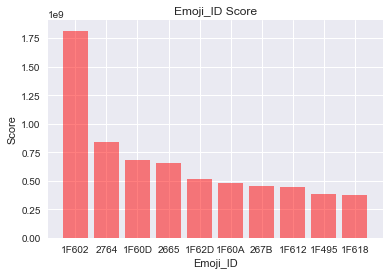

In [12]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
plt.bar(Emoji_Id, Score, color='r', alpha=0.50, align="center")
plt.xlabel("Emoji_ID")
plt.ylabel("Score")
plt.title("Emoji_ID Score")

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [13]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
Emoji = zip(Emoji_Id, Score)
Emoji_PD = pd.DataFrame(Emoji)
Emoji_PD = Emoji_PD.rename(columns={0:"Emoji_Id", 1:"Score"})
Emoji_PD.set_index('Emoji_Id')

,Score
Emoji_Id,
1F602,1814832150
2764,840619939
1F60D,680382416
2665,652715459
1F62D,515991922
1F60A,484540701
267B,452489849
1F612,441690175
1F495,381679908


Plot using Pandas

Text(0.5, 1.0, 'Emoji_Id Score')

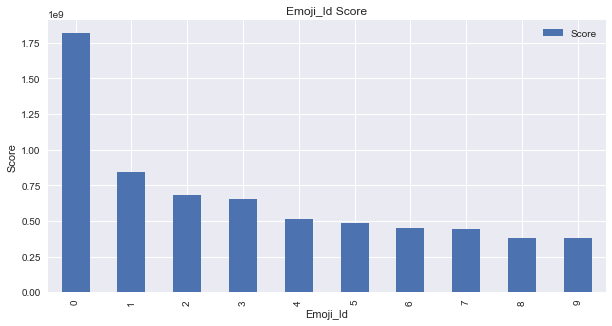

In [14]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
Emoji_PD.plot(kind="bar", figsize=(10,5), rot = 90)
plt.xlabel("Emoji_Id")
plt.ylabel("Score")
plt.title("Emoji_Id Score")

In [ ]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE